In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [18]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model

model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  
# our output layer. 10 units for 10 classes. Softmax for probability distribution

In [19]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  
              # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2649 - acc: 0.9222
Epoch 2/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1112 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0752 - acc: 0.9765


In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0832 - acc: 0.9745
Loss: 0.08315901251081377
Accuracy: 0.9745


W0625 22:06:57.466372 18080 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


1


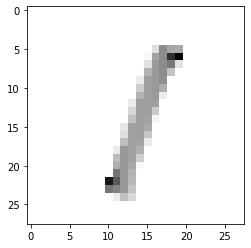

In [21]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(np.argmax(predictions[5]))
plt.imshow(x_test[5],cmap=plt.cm.binary)
plt.show()